# Configuration et Imports

In [6]:
import sys
from pathlib import Path

# Ajouter le projet au path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

# Imports PyTorch
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Imports depuis src/
from src.data_loader import get_data_loaders
from src.models import BaselineCNN
from src.utils import get_mixup_cutmix_transform
from src.trainer import train_model

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Chemins
TRAIN_DIR = project_root / 'data' / 'train'
VAL_DIR = project_root / 'data' / 'val'

Device: cpu


# Data Loader

In [7]:
# Charger les données
train_loader, val_loader, class_names = get_data_loaders(
    train_dir=str(TRAIN_DIR),
    val_dir=str(VAL_DIR),
    batch_size=18,
    img_size=120
)

print(f"\n✅ Classes: {class_names}")
print(f"📦 Train batches: {len(train_loader)}")
print(f"📦 Val batches: {len(val_loader)}")


✅ Classes: ['0', '1', '2', '3', '4', '5']
📦 Train batches: 757
📦 Val batches: 190


# model ResNet18

In [4]:
from torchvision.models import resnet18, ResNet18_Weights

# ==============================================================
# 5. Modèle : ResNet18 avec fine-tuning COMPLET
# ==============================================================
model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Adapter la tête pour 6 classes (si pas déjà fait)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 6)

# === UNFROST TOUT LE MODÈLE ===
for param in model.parameters():
    param.requires_grad = True  # Tout est trainable maintenant


print("Modèle prêt pour fine-tuning complet !")

# ==============================================================
# 6. Loss, Optimizer, Scheduler (adapté pour full fine-tune)
# ==============================================================
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Optimizer avec LR bas pour tout le modèle (important pour ne pas détruire les poids pré-entraînés)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)  # LR=0.0001

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', patience=3, factor=0.5
)

Modèle prêt pour fine-tuning complet !


# MixUp/CutMix

In [5]:
num_classes = len(class_names)  # 6
cutmix_or_mixup = get_mixup_cutmix_transform(num_classes, mixup_alpha=0.2, cutmix_alpha=1.0, apply_prob=0.5)

# Trainer

🚀 DÉBUT DE L'ENTRAÎNEMENT - 20 epochs


Epoch 1/20 [Train]:   0%|                                                   | 0/426 [00:00<?, ?it/s]C:\Users\SOL\anaconda3\envs\fastocr_env\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                                                                                                    


📊 Epoch [1/20] - 655.36s
  Train → Loss: 0.9498, Accuracy: 79.73%
  Val   → Loss: 0.6454, Accuracy: 90.09%
  LR    → 0.000100
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.6454)
----------------------------------------------------------------------



📊 Epoch [2/20] - 862.42s
  Train → Loss: 0.8371, Accuracy: 85.09%
  Val   → Loss: 0.6055, Accuracy: 91.85%
  LR    → 0.000100
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.6055)
----------------------------------------------------------------------



📊 Epoch [3/20] - 658.12s
  Train → Loss: 0.8233, Accuracy: 86.47%
  Val   → Loss: 0.5839, Accuracy: 92.81%
  LR    → 0.000100
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.5839)
----------------------------------------------------------------------



📊 Epoch [4/20] - 813.48s
  Train → Loss: 0.7990, Accuracy: 87.03%
  Val   → Loss: 0.6213, Accuracy: 92.11%
  LR    → 0.000100
  ⚠️  Patience: 1/4
----------------------------------------------------------------------



📊 Epoch [5/20] - 908.69s
  Train → Loss: 0.7640, Accuracy: 88.68%
  Val   → Loss: 0.5991, Accuracy: 92.61%
  LR    → 0.000100
  ⚠️  Patience: 2/4
----------------------------------------------------------------------



📊 Epoch [6/20] - 899.33s
  Train → Loss: 0.7629, Accuracy: 88.52%
  Val   → Loss: 0.5922, Accuracy: 92.61%
  LR    → 0.000100
  ⚠️  Patience: 3/4
----------------------------------------------------------------------



📊 Epoch [7/20] - 944.41s
  Train → Loss: 0.7508, Accuracy: 89.34%
  Val   → Loss: 0.5785, Accuracy: 93.08%
  LR    → 0.000100
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.5785)
----------------------------------------------------------------------



📊 Epoch [8/20] - 903.72s
  Train → Loss: 0.7254, Accuracy: 90.19%
  Val   → Loss: 0.5821, Accuracy: 92.75%
  LR    → 0.000100
  ⚠️  Patience: 1/4
----------------------------------------------------------------------



📊 Epoch [9/20] - 928.84s
  Train → Loss: 0.7455, Accuracy: 89.60%
  Val   → Loss: 0.5814, Accuracy: 92.70%
  LR    → 0.000100
  ⚠️  Patience: 2/4
----------------------------------------------------------------------



📊 Epoch [10/20] - 967.19s
  Train → Loss: 0.7250, Accuracy: 90.48%
  Val   → Loss: 0.6007, Accuracy: 92.08%
  LR    → 0.000100
  ⚠️  Patience: 3/4
----------------------------------------------------------------------



📊 Epoch [11/20] - 966.92s
  Train → Loss: 0.7157, Accuracy: 90.57%
  Val   → Loss: 0.5751, Accuracy: 93.19%
  LR    → 0.000100
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.5751)
----------------------------------------------------------------------



📊 Epoch [12/20] - 1032.52s
  Train → Loss: 0.7121, Accuracy: 91.31%
  Val   → Loss: 0.5846, Accuracy: 92.84%
  LR    → 0.000100
  ⚠️  Patience: 1/4
----------------------------------------------------------------------



📊 Epoch [13/20] - 1060.69s
  Train → Loss: 0.6907, Accuracy: 91.27%
  Val   → Loss: 0.5774, Accuracy: 93.02%
  LR    → 0.000100
  ⚠️  Patience: 2/4
----------------------------------------------------------------------



📊 Epoch [14/20] - 1036.50s
  Train → Loss: 0.7179, Accuracy: 91.38%
  Val   → Loss: 0.5806, Accuracy: 93.17%
  LR    → 0.000100
  ⚠️  Patience: 3/4
----------------------------------------------------------------------



📊 Epoch [15/20] - 989.57s
  Train → Loss: 0.7347, Accuracy: 90.40%
  Val   → Loss: 0.5971, Accuracy: 92.90%
  LR    → 0.000050
  ⚠️  Patience: 4/4

🛑 Early stopping à l'epoch 15
   Meilleur modèle: Epoch 11 (Val Loss: 0.5751)

✅ ENTRAÎNEMENT TERMINÉ en 227.14 minutes
   Meilleur epoch: 11 | Best Val Loss: 0.5751


C:\Users\SOL\AppData\Local\Temp\ipykernel_16400\1530364206.py:237: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SOL\AppData\Local\Temp\ipykernel_16400\1530364206.py:238: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('training_history.png', dpi=300, bbox_inches='tight')



📊 Graphiques sauvegardés: training_history.png


C:\Users\SOL\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


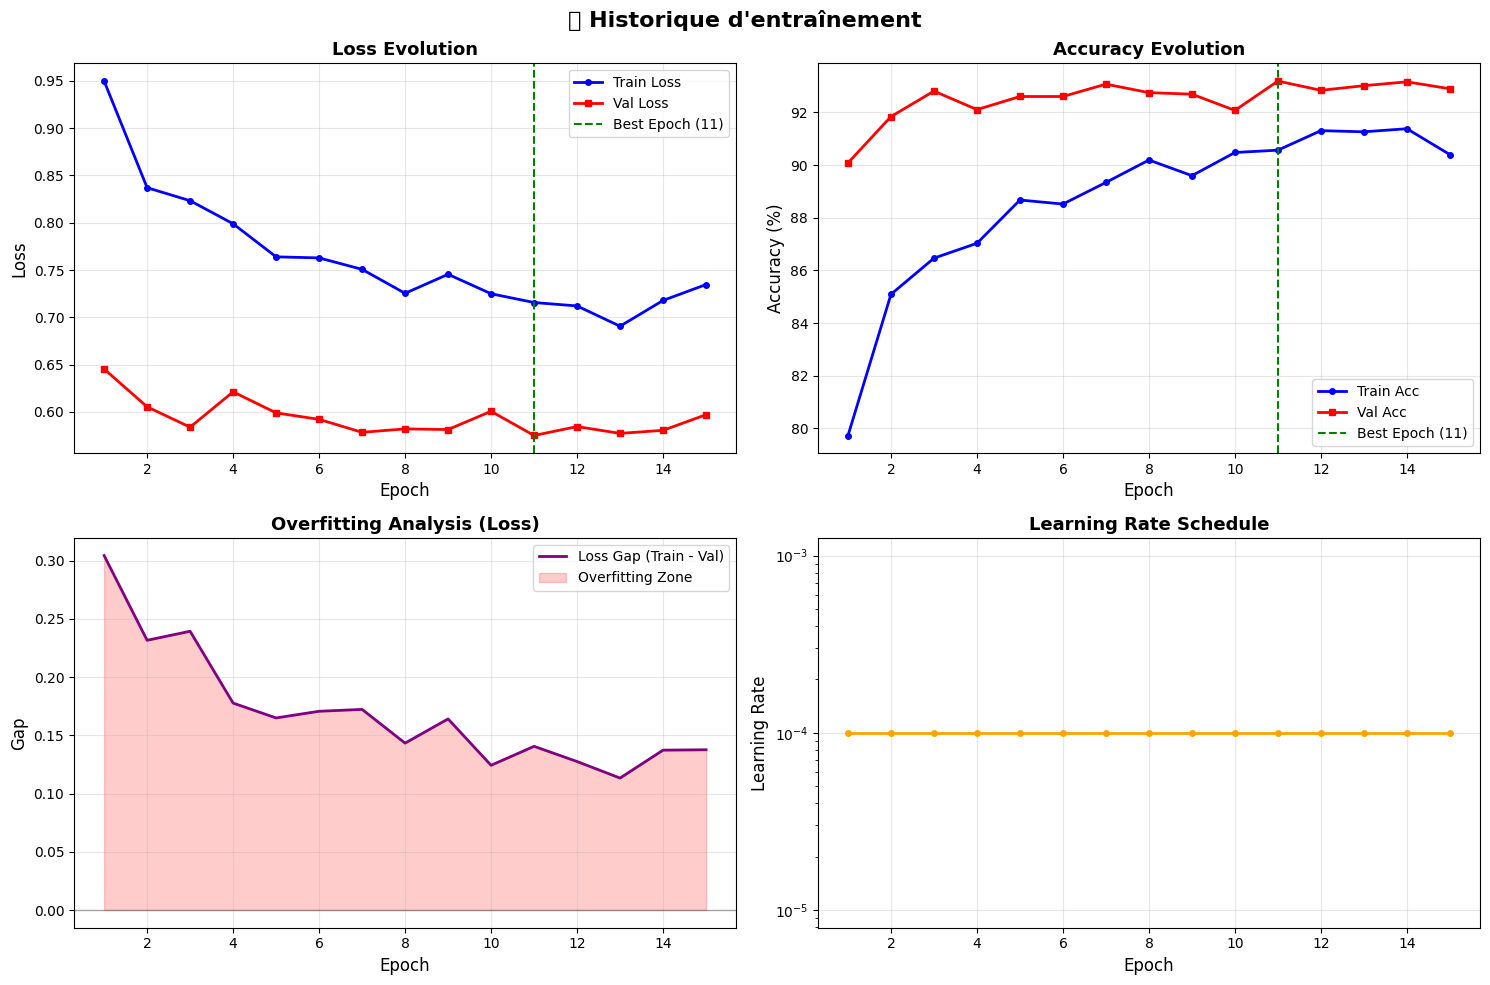


📋 RÉSUMÉ STATISTIQUE
Train Loss → Min: 0.6907, Max: 0.9498, Final: 0.7347
Val Loss   → Min: 0.5751, Max: 0.6454, Final: 0.5971
Train Acc  → Min: 79.73%, Max: 91.38%, Final: 90.40%
Val Acc    → Min: 90.09%, Max: 93.19%, Final: 92.90%
Overfitting Gap → -2.50% (Train - Val)
[90.0850689351716, 91.84511586975653, 92.81314168377824, 92.10912290994426, 92.60780287474333, 92.60780287474333, 93.07714872396598, 92.7544734526254, 92.69580522147257, 92.07978879436784, 93.19448518627163, 92.84247579935465, 93.01848049281314, 93.16515107069522, 92.90114403050748]


In [13]:
history = train_with_mixup_cutmix(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    num_epochs=20,
    device='cpu',
    early_stopping_patience=4,
    save_best_model=True,
    model_path='best_model_resnet_all.pth'
)

# Accéder à l'historique
print(history['val_acc'])  # Liste des accuracies de validation